# 피마 인디언 당뇨병 예측 사례

북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터

캐글 사이트(https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Feature 설명
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin: 혈청 인슐린
- BMI: 체질량 지수(체중/키)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값

In [1]:
# Miscellaneous operating system interfaces
import os

# JSON encoder and decoder
import json

# Basic date and time types
from datetime import date, datetime, timedelta

# The fundamental package for scientific computing with Python.
import numpy as np

# Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more
import pandas as pd

# Set the absolute directory path.
BASE_PATH = os.path.abspath('')
APP_PATH = os.path.dirname(BASE_PATH)
DATA_PATH = os.path.join(APP_PATH, '00.data')

In [2]:
# Statistical data visualization using matplotlib.
import seaborn as sns

# matplotlib: plotting with Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Set the matplotlib color cycle using a seaborn palette.
sns.set_palette('pastel')

# plot outputs appear and be stored within the notebook.
%matplotlib inline

# A module for finding, managing, and using fonts across platforms.
mpl.font_manager._rebuild()
sorted([f.name for f in mpl.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])

mpl.rc('axes', unicode_minus=False)

if sys.platform.startswith('darwin'):
    mpl.rc('font', family='AppleGothic')
elif sys.platform.startswith('win32'):
    mpl.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, 'kaggle.com', 'pima-indians-diabetes-database', 'diabetes.csv'))
df = df.fillna(0)

# df.rename(columns={
#     'Pregnancies': '임신 횟수',
#     'Glucose': '포도당 부하 검사 수치',
#     'BloodPressure': '혈압',
#     'SkinThickness': '팔 삼두근 뒤쪽의 피하지방 측정값',
#     'Insulin': '혈청 인슐린',
#     'BMI': '체질량 지수(체중/키)',
#     'DiabetesPedigreeFunction': '당뇨 내력 가중치 값',
#     'Age': '나이',
#     'Outcome': '클래스 결정 값',
# }, inplace=True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
## It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


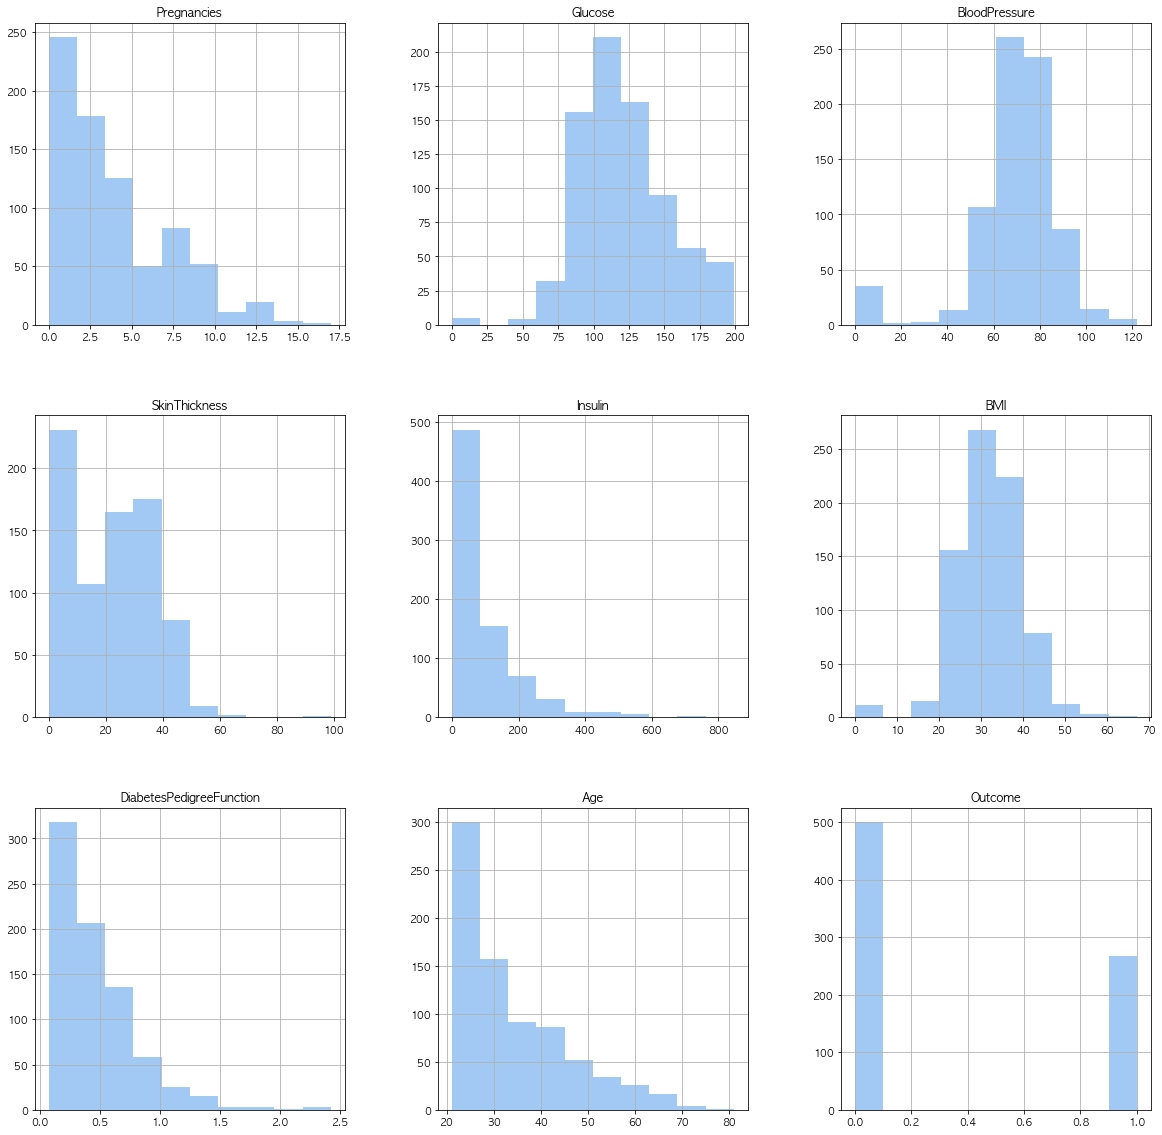

In [7]:
## To fill these Nan values the data distribution needs to be understood
p = df.hist(figsize = (20,20))

In [8]:
## Aiming to impute nan values for the columns in accordance with their distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

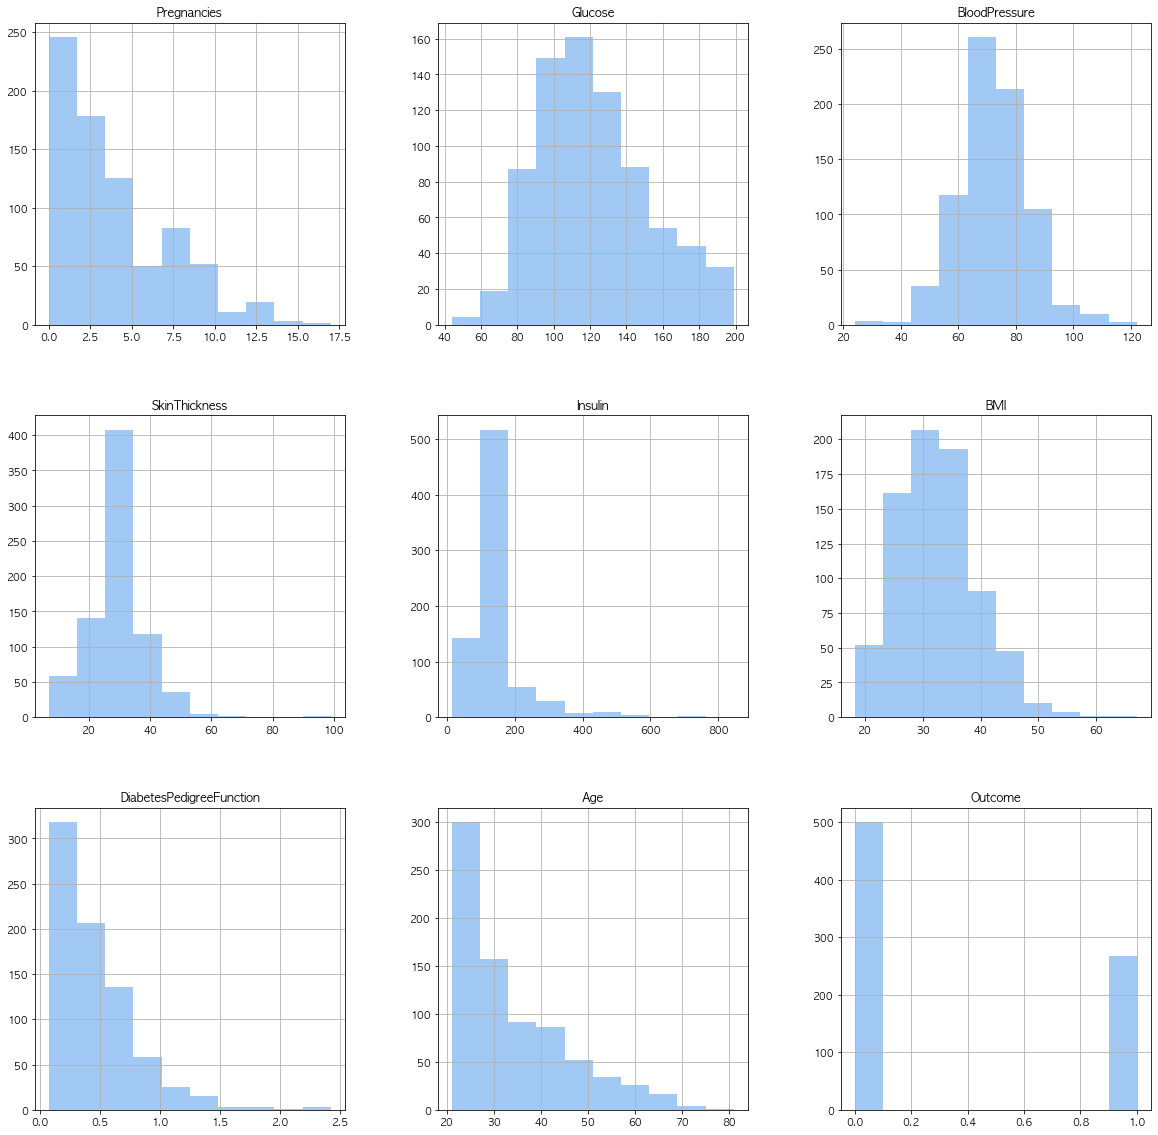

In [9]:
## Plotting after Nan removal
p = df_copy.hist(figsize = (20,20))

## Skewness

In [10]:
## observing the shape of the data
df.shape

(768, 9)

In [11]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=df.dtypes, data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

TypeError: data type 'Pregnancies' not understood